Catherine Johanna Rojas Mendoza
A01798149
26/08/24

# **Ses02_Challenge.pdf**

It has happened. Aliens have arrived. They hail from a planet called Valhalla-23,
where the temperature is measured in Valks. These visitors tell you that they have
come to solve Earth’s global warming crisis*. They offer you a machine that will
solve the problem, but they warn you:
1. The machine must be set up in Valks.
2. If you input a wrong temperature value, you may end up freezing or scorching
the Earth.
3. No one knows how to transform between Celsius and Valks.
† You are tasked with finding a model for solving this problem, so you ask Humans
and Valkians to collect temperature readings from several objects. The data are given
in the Valhalla23.csv file



In [31]:
# Importar módulos
import pandas as pd                                       # para cargar datos
from sklearn.model_selection import train_test_split      # train_test_split
from sklearn.linear_model import LinearRegression         # regresión y clasificación
from sklearn.metrics import mean_squared_error, r2_score  # para puntajes

In [32]:
# Cargar datos
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial Avanzada para la Ciencia de Datos/Machine Learning/Regresion lineal/Vallhala/Valhalla23.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Seleccionar las variables independiente (Celsius) y dependiente (Valks)
X = df[['Celsius']].values
y = df['Valks'].values

# **Linear Regression Model**

In [34]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

El código divide el conjunto de datos en un 80% para entrenamiento y un 20% para prueba, lo cual es una práctica común para evaluar el rendimiento del modelo. Al probar otras divisiones, como 70% para entrenamiento y 30% para prueba, las métricas de evaluación mostraron una ligera disminución en los puntajes del conjunto de entrenamiento y prueba, mientras que el error cuadrático medio aumentó en aproximadamente 4 unidades. Posteriormente, al probar con una división de 90% para entrenamiento y 10% para prueba, se observó un pequeño incremento en el puntaje del entrenamiento, pero un descenso en el puntaje del conjunto de prueba, junto con un aumento significativo en el error cuadrático medio de alrededor de 8 unidades en comparación con la división 80-20. Analizando estos resultados, se decidió utilizar la división 80-20 para entrenar el modelo.


En este caso, el modelo implementado, LinearRegression utiliza una solución analítica para calcular los coeficientes óptimos de la regresión lineal. Esto se realiza mediante una fórmula matemática que encuentra directamente la mejor línea que minimiza el error cuadrático medio. Por ello no se manejan parámetros como el número de iteraciones, la tasa de aprendizaje o valores iniciales.

Sin emabargo, se podría aplicar un modelo SGDRegressor si buscaramos más flexibilidad en el control del proceso de optimización, ya que este permite ajustar estos parámetros, pues usa un enfoque iterativo (descenso de gradiente) para encontrar la solución pero a costa de una mayor complejidad y potenciales desafíos, como la necesidad de seleccionar adecuadamente los hiperparámetros.

In [35]:
# Evaluar el modelo usando el método score
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

# Evaluar el modelo usando métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Train Score: 0.993035561819186
Test Score: 0.9976240798987097
Mean Squared Error: 20.18813776711824
Root Mean Squared Error: 4.493121160965753
R-squared: 0.9976240798987097


Los valores de R^2 tanto en el conjunto de entrenamiento como en el de prueba son extremadamente altos, lo que indica que el modelo tiene un excelente ajuste a los datos y generaliza muy bien a datos no vistos, por lo que se puede decir que tiene un alto rendimiento.

Los valores de MSE y RMSE son bajos, lo que indica que el modelo realiza predicciones muy precisas y que los errores de predicción son pequeños.

Dado que el test score es incluso un poco mayor que el train score, no parece haber sobreajuste, lo cual es un buen indicativo de que el modelo está bien ajustado y es robusto.

Estos resultados indican que el modelo entrenado es altamente efectivo para predecir la relación entre Celsius y Valks en los datos que se han utilizado.

In [36]:
# Imprimir los coeficientes del modelo
print("Intercepto (theta_0):", model.intercept_)
print("Coeficientes (theta_1):", model.coef_)

Intercepto (theta_0): 49.53876671222612
Coeficientes (theta_1): [-2.98117122]


$$
\text{Valks} = \theta_0 + \theta_1 \times \text{Celsius}
$$

Donde:

- $\theta_0$ es el intercepto.
- $\theta_1$ es el coeficiente (la pendiente de la línea de regresión).
- Celsius es la variable independiente.


$$
\theta_0 = 49.53876671222612
$$

$$
\theta_1 = -2.98117122
$$

La fórmula matemática del modelo sería:

$$
\text{Valks} = 49.53876671222612 - 2.98117122 \times \text{Celsius}
$$


Esta fórmula permite predecir el valor de Valks para cualquier valor dado de Celsius.


El coeficiente negativo sugiere que existe una relación inversa entre Celsius y Valks, es decir, cuando una aumenta, la otra disminuye.
La magnitud del coeficiente indica que la temperatura en Valks cambia significativamente (casi 3 unidades) por cada grado de cambio en Celsius, lo cual es un cambio notable.
Esto quiere decir que el modelo predice que, sin importar el valor exacto de Celsius, el valor en Valks comenzará en aproximadamente 49.54 cuando Celsius es 0 y luego disminuirá a una tasa de aproximadamente 2.98 Valks por cada grado Celsius adicional.



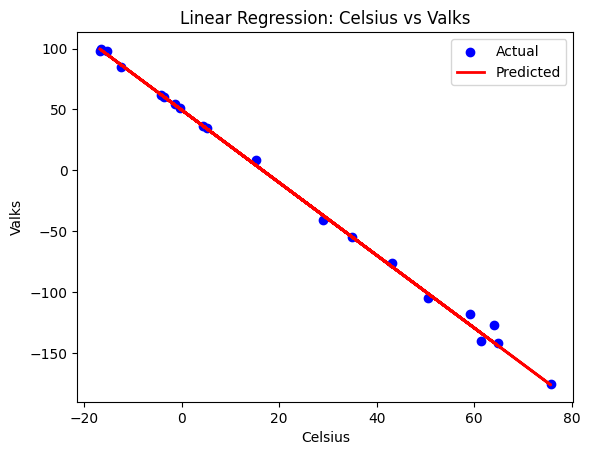

     Celsius  Predicted Valks
0   34.97200       -54.718753
1   -3.73880        60.684770
2   64.07200      -141.470836
3   28.97600       -36.843651
4   -1.31270        53.452150
5  -16.55500        98.892056
6   64.91300      -143.978001
7   15.16600         4.326324
8   -4.23870        62.175057
9   61.47200      -133.719791
10  59.22100      -127.009174
11  50.60500      -101.323403
12   4.35250        36.563219
13 -15.38300        95.398124
14 -12.41500        86.550007
15  43.23600       -79.355152
16  -0.34047        50.553766
17   5.10840        34.309752
18  75.71700      -176.186575
19 -16.81700        99.673123


In [37]:
import matplotlib.pyplot as plt

# Visualizar los resultados
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Linear Regression: Celsius vs Valks')
plt.legend()
plt.show()

# Mostrar los valores predichos
predicciones = pd.DataFrame({'Celsius': X_test.flatten(), 'Predicted Valks': y_pred})
print(predicciones)

La gráfica confirma visualmente que el modelo de regresión lineal es adecuado para describir la relación entre Celsius y Valks en el conjunto de datos, y proporciona predicciones precisas. La relación lineal inversa es claramente visible y bien capturada por el modelo.

# **SGDRegressor Model**

In [38]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [39]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


En este caso, se busca aplicar un modelo de regresión con SGDRegressor. Al igual que en el modelo anterior, se opta por utilizar un test_size=0.2, asignando el 20% de los datos al conjunto de prueba y el 80% al conjunto de entrenamiento. Esta proporción se eligió porque en las pruebas anteriores con regresión lineal, esta división demostró ser la más efectiva.

Además, se decidió implementar el escalado de datos, ya que durante las pruebas iniciales de entrenamiento las predicciones resultaron ineficaces. Al escalar los datos, se asegura que las características, en este caso Celsius y Valks, contribuyan de manera equilibrada al ajuste del modelo, lo que mejora tanto la estabilidad como la velocidad de convergencia. Este paso también evita que las características con valores más grandes dominen el modelo. Tras aplicar el escalado, se obtuvieron predicciones significativamente mejores, similares a las logradas con el modelo de LinearRegression.


In [40]:
# Definir el modelo
model = SGDRegressor()

# Definir los parámetros que deseas probar
param_grid = {
    'max_iter': [1000, 1500, 2000],
    'tol': [1e-3, 1e-4, 1e-5],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 0.001],
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l2', 'l1', 'elasticnet']
}

# Implementar Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

# Entrenar el modelo
grid_search.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test_scaled)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

# **Justificación de la elección de parámetros**

Los parámetros en `param_grid` permiten explorar diversas configuraciones del modelo `SGDRegressor` para encontrar la combinación óptima que maximice el rendimiento. Grid Search evalúa todas las combinaciones posibles en el conjunto de entrenamiento, utilizando la métrica R^2 para identificar la configuración que ofrece los mejores resultados. Esto ayuda a equilibrar el rendimiento del modelo y el tiempo de entrenamiento, encontrando el ajuste óptimo para el problema. La aplicación de GridSeach utiliza el hiperparámetro cv=5, el cual proporciona una validación cruzada robusta que ayuda a obtener una estimación confiable del rendimiento del modelo sin incurrir en tiempos de cómputo excesivamente largos. Este valor es adecuado y típicamente usado para muchos problemas de machine learning.

+ Para el parámetro `max_iter`, que determina el número máximo de iteraciones que el algoritmo realizará antes de detenerse, se probaron los valores [1000, 1500, 2000] con el objetivo de evaluar el comportamiento del modelo y las predicciones resultantes. Se optó por valores relativamente grandes para observar si el modelo lograba una mejor convergencia, pues probar con diferentes valores de max_iter permite asegurarnos de que el modelo tenga tiempo suficiente para converger, sin caer en problemas de sobreajuste ni realizar iteraciones innecesariamente largas, donde valores más altos pueden ser beneficiosos en problemas más complejos, mientras que valores más bajos pueden prevenir el sobreentrenamiento y reducir el tiempo de entrenamiento.

+ El parámetro `tol` define el criterio de tolerancia que determina cuándo detener las iteraciones del modelo. Si el cambio en la función de coste entre iteraciones consecutivas es menor que el valor de tol, el entrenamiento se detendrá antes de alcanzar el número máximo de iteraciones.

  Al ajustar este parámetro desde 1e-3 hasta 1e-5, se puede adaptar el modelo de acuerdo a las necesidades de precisión y tiempo de entrenamiento:

  **1e-3:** Convergencia más rápida, adecuada cuando no se requiere una precisión extrema.

 **1e-4:** Equilibrio entre precisión y eficiencia, ideal para la mayoría de los casos.

  **1e-5:** Convergencia más lenta pero más precisa, útil cuando se busca maximizar la exactitud, aunque implique tiempos de entrenamiento más largos.


+ El parámetro `learning_rate` ajusta el tamaño de los pasos del algoritmo:

  **constant:** Mantiene un tamaño de paso fijo.

  **optimal:** Ajusta el paso dinámicamente según el número de iteraciones.

  **invscaling:** Disminuye el paso conforme avanzan las iteraciones.

  **adaptive:** Reduce el paso si no hay mejora después de varias iteraciones.


+ `eta0` es el valor inicial del tamaño del paso cuando se utiliza una estrategia de tasa de aprendizaje constante, inversa o adaptativa. Probar diferentes valores ajusta la velocidad de ajuste del modelo, donde un valor mayor (e.g., 0.1) permite pasos grandes al inicio, mientras que un valor menor (e.g., 0.001) promueve una convergencia más lenta y precisa. Este parámetro es relevante solo con las estrategias constant, invscaling o adaptive. Al igual que en los otros parámetros, se busca explorar el comportamiento del modelo para elegir el mejores.


+ El parámetro `alpha` controla la regularización en el modelo, penalizando los coeficientes para evitar el sobreajuste:

  **alpha pequeño (0.0001):** Penalización débil, permite mayor ajuste de los coeficientes, es útil si los datos son limpios y el riesgo de sobreajuste es bajo.

  **alpha grande (0.01):** Penalización fuerte, útil en datos ruidosos o con riesgo de sobreajuste, aunque puede provocar subajuste si es excesiva.


+ El parámetro `penalty` define el tipo de regularización y se prueban diferentes opciones para que el Grid Search seleccione el mejor.

  **l2:** Regularización Ridge, reduce coeficientes grandes pero no los lleva a cero, es útil para mantener todos los coeficientes pequeños.

  **l1:** Regularización Lasso, fuerza algunos coeficientes a cero, ayudando en la selección de características.

  **elasticnet:** Combina L1 y L2, equilibrando selección de características e inclinación a regularizar los coeficientes restantes.







In [41]:
# Obtener los mejores parámetros
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el modelo con los mejores parámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print("Test Score con los mejores parámetros:", test_score)



Mejores parámetros encontrados:
{'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant', 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 1e-05}
Test Score con los mejores parámetros: 0.9961821645008203


In [42]:
# Evaluar el modelo usando el método score
train_score = best_model.score(X_train_scaled, y_train)
test_score = best_model.score(X_test_scaled, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

# Evaluar el modelo usando métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Train Score: 0.9920090603389556
Test Score: 0.9961821645008203
Mean Squared Error: 32.44005932176539
Root Mean Squared Error: 5.695617554029185
R-squared: 0.9961821645008203


Los valores de R^2 tanto en el conjunto de entrenamiento como en el de prueba son extremadamente altos y similares a los del modelo aplicando LinealRegression, lo que indica que el modelo tiene un excelente ajuste a los datos y generaliza muy bien a datos no vistos, por lo que se puede decir que tiene un alto rendimiento.

Los valores de MSE y RMSE son bajos, lo que indica que el modelo realiza predicciones muy precisas y que los errores de predicción son pequeños. Incluso estos son menores que en el modelo de LinealRegression.

Dado que el test score es incluso un poco mayor que el train score, no parece haber sobreajuste, lo cual es un buen indicativo de que el modelo está bien ajustado y es robusto.

Estos resultados indican que el modelo entrenado es altamente efectivo para predecir la relación entre Celsius y Valks en los datos que se han utilizado.

In [43]:
# Imprimir los coeficientes del modelo
print("Intercepto (theta_0):", best_model.intercept_)
print("Coeficientes (theta_1):", best_model.coef_)

Intercepto (theta_0): [-58.78144523]
Coeficientes (theta_1): [-86.18089836]


$$
\text{Valks} = \theta_0 + \theta_1 \times \text{Celsius}
$$

Donde:

- $\theta_0$ es el intercepto.
- $\theta_1$ es el coeficiente (la pendiente de la línea de regresión).
- Celsius es la variable independiente.


$$
\theta_0 = -54.57752772
$$

$$
\theta_1 = -83.84018095
$$

La fórmula matemática del modelo sería:

$$
\text{Valks} = -54.57752772 - 83.84018095 \times \text{Celsius}
$$


Esta fórmula permite predecir el valor de Valks para cualquier valor dado de Celsius.


En este caso, si la temperatura es 0 grados Celsius, el valor de Valks sería aproximadamente -54.58 y  por cada incremento de 1 grado Celsius, el valor de Valks disminuye en aproximadamente 83.84 unidades.

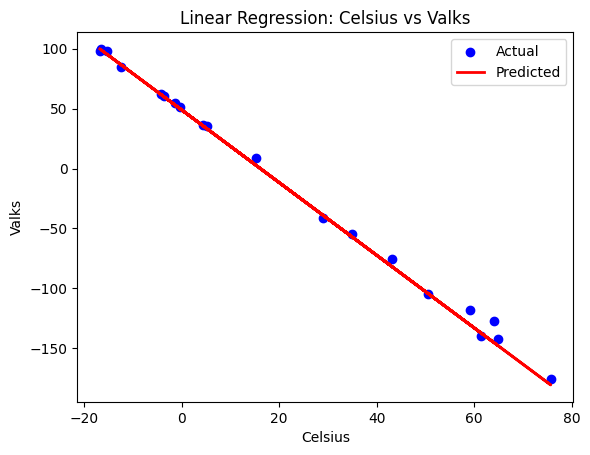

     Celsius  Predicted Valks
0   34.97200       -57.071602
1   -3.73880        60.146773
2   64.07200      -145.187960
3   28.97600       -38.915393
4   -1.31270        52.800413
5  -16.55500        98.954913
6   64.91300      -147.734553
7   15.16600         2.902027
8   -4.23870        61.660497
9   61.47200      -137.315021
10  59.22100      -130.498872
11  50.60500      -104.409163
12   4.35250        35.645884
13 -15.38300        95.406034
14 -12.41500        86.418771
15  43.23600       -82.095436
16  -0.34047        49.856448
17   5.10840        33.356978
18  75.71700      -180.449643
19 -16.81700        99.748263


In [44]:
# Visualizar los resultados
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Linear Regression: Celsius vs Valks')
plt.legend()
plt.show()

# Mostrar los valores predichos
predicciones = pd.DataFrame({'Celsius': X_test.flatten(), 'Predicted Valks': y_pred})
print(predicciones)

La gráfica confirma visualmente que el modelo aplicando SGDRegression con los mejores parámetros que encontró a través de GridSearch, es adecuado para describir la relación entre Celsius y Valks en el conjunto de datos, y proporciona predicciones precisas. La relación lineal inversa es claramente visible y bien capturada por el modelo y las predicciones obtenidas son muy similares a las del modelo aplicando LinealRegression.

In [45]:
# !jupyter nbconvert --to html "/content/drive/MyDrive/ColabNotebooks/Ses02_Challenge.ipynb"